# MAD4401 - Project 2

---

## Problem 1

### (a) Complete the table

In [1]:
"""
EulersMethod(f, a, b, N, α) - implementation of Euler's method 
for finding approximate solutions for initial value problems.
Arguments:
    - f = a function object representing first derivative
    - a = inf of f
    - b = sup of f
    - N = number of mesh points (doesn't include initial point)
    - α = the initial value given (may need to be float)
"""
function EulersMethod(f, a, b, N, α)
    # Set up conidtions to and output the initial values
    h = (b-a)/N    # step size 
    t = a    # set first mesh point to first point in interval 
    w = α    # set the initial value for w0
#    println("w0 = ", α)    # simply print initial value 
    vals = [w]    # vector to return approximations
    
    # compute approximations for remaining mesh points
    for i in 1:N
        w = w + h*f(t,w)    # compute w_i
        t = a + i*h    # compute t_i
#        println("w", i, " = ", w)
        # instead of printing the values of w, add them to a vector and return that instead
        append!(vals, w)
    end #for
    return vals
end;

In [2]:
# implementation of first derivative
function f(t,y)
    (t^-2)*(sin(2t)-2t*y)
end;

In [3]:
# compute approximations 
approximations = EulersMethod(f, 1, 2, 4, 2.);

In [4]:
approximations

5-element Vector{Float64}:
 2.0
 1.2273243567064205
 0.8321501570804852
 0.5704467722825309
 0.37882661467612455

### (b) Plot the approximation

In [5]:
using Plots

In [6]:
# exact function 
function g(t)
    (1/2)*(t^-2)*(4+cos(2)-cos(2t))
end;

In [7]:
# compute exact values 
exact = g.(collect(1:.25:2));

In [8]:
exact

5-element Vector{Float64}:
 2.0
 1.4031989692799334
 1.0164101466785118
 0.7380097715499842
 0.5296870980395587

<br>Below is the graph comparing the exact value to the approximated values.

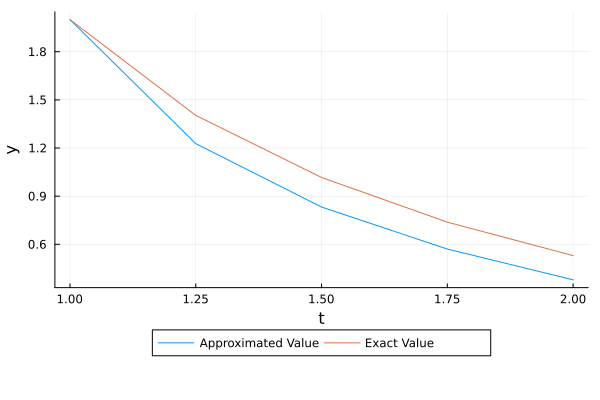

In [9]:
x = collect(1:.25:2)
y1 = approximations
y2 = exact
plot(x,[approximations,exact], label=["Approximated Value" "Exact Value"])
plot!(legend=:outerbottom, legendcolumns=2)
xlabel!("t")
ylabel!("y")

### (c)

In [10]:
# compute exact values for given y(2)
exactVal = g(2)

0.5296870980395587

In [11]:
# compute approximated values at each given N
approximations = [];
i = 2
while i <= 32
    approximations2 = EulersMethod(f,1,2,i,2.)
    append!(approximations, approximations2[end]) # only take the last approximation
    i = i*2
end

In [12]:
# computed approximations at each N
approximations

5-element Vector{Any}:
 0.18290957292869525
 0.37882661467612455
 0.45878660562608714
 0.495261988720689
 0.5127188700310937

In [13]:
# compute errors
errors = []
for j in 1:5
    append!(errors,(abs.(approximations[j]-exactVal)))
end

In [14]:
errors

5-element Vector{Any}:
 0.34677752511086346
 0.15086048336343416
 0.07090049241347157
 0.03442510931886972
 0.01696822800846498

### (d) Use the loglog in Matlab to plot and verity the error is converging at the rate O(h).

In [15]:
using Plots

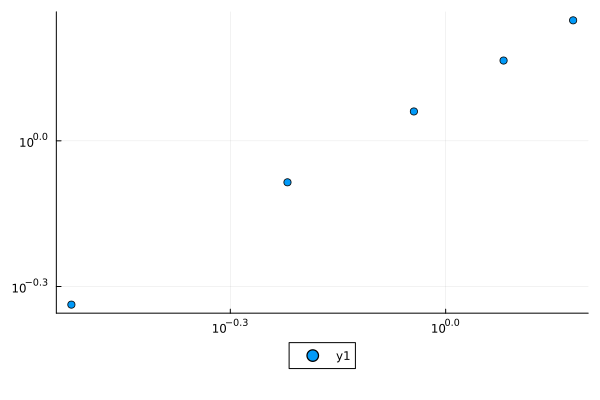

In [26]:
x = [2,4,8,16,32]
logErrs = abs.(log10.(errors))
scatter(log10.(x), logErrs)
scatter!(xscale=:log10, yscale=:log10)
scatter!(legend=:outerbottom)